In [150]:
from cmap import Colormap

# more at https://cmap-docs.readthedocs.io/en/latest/catalog/

# case insensitive
mapped = ('crameri:vikO', 'crameri:corkO', 'crameri:berlin', 'crameri:vik',
          'colorbrewer:Blues', 'colorbrewer:BrBG', 'colorbrewer:Spectral',
          'matplotlib:coolwarm',
          'seaborn:icefire',
          'colorcet:CET_C3',
          'tol:nightfall', 'tol:sunset',
          'vispy:diverging', 'vispy:RdBu', 'vispy:RdYeBuCy', 
          'cmocean:curl', 'cmocean:thermal', 'cmocean:tarn', 'cmocean:turbid', 'cmocean:topo', 'cmocean:delta', 
          'cmocean:balance', 'cmocean:diff')

categories = {'cyclic': 'ColorMap::Cyclic', 
              'sequential': 'ColorMap::Sequential', 
              'diverging': 'ColorMap::Divergent',
              'miscellaneous': 'ColorMap::Miscellaneous'}

path = "/home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/"

In [151]:
import numpy as np

def generate_for(map_name, print_only = False):
    cm = Colormap(map_name)
    display(cm)

    # Get RGB values for 256 colors
    colors = cm(np.linspace(0, 1, 256))

    write = print
    file = None

    if not print_only:
        cmap_filename = map_name.replace(':', '_') + '.inl'
        full_path_and_filename = path + cmap_filename
    
        file = open(full_path_and_filename, "w")
        write = file.write
    

    write("auto {} = New<ColorMap>(\n\t\"{}\",\n\t{},\n\tColorSequence{{".format(map_name.replace(':', '_'), map_name, categories[cm.category]))


    # Print RGB values
    for i, color in enumerate(colors):
        formatted_string = ', '.join([f"{x:>1.8f}" for x in color])
        formatted_string = f"Color({formatted_string})"
        # color = str(color).replace('[', '\t\tColor(').replace(']','),\n').replace(' 0', ', 0').replace(' 1.', ', 1.')
        write(f"\n\t\t{formatted_string},")

    write("\n\t}\n);")

    if file is not None: 
        file.close()
    
        print("Seems like everything went fine enough for", full_path_and_filename)
        

In [152]:
def wrap_it_up():
    file = open(path + "all_colormaps.inl", 'w')
    write = file.write
    #write = print

    write("// Generated automatically from https://github.com/tlambert03/cmap maps. Names are kept original, copyright can be verified at site.\n")

    for map_name in mapped:
        cmap_filename = map_name.replace(':', '_') + '.inl'
        full_path_and_filename = path + cmap_filename
        write('\n#include "{}.inl"'.format(map_name.replace(':', '_')))

    write('\n\nstd::map<Str, Pointer<const ColorMap>> ColorMaps_auto = {')

    for map_name in mapped:
        write('\n\tMap({}),'.format(map_name.replace(':', '_')))

    write("};")

    file.close()

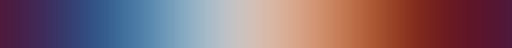

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_vikO.inl


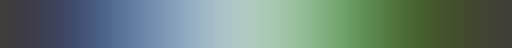

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_corkO.inl


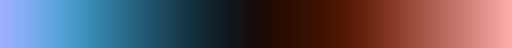

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_berlin.inl


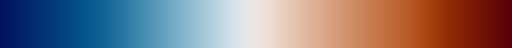

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/crameri_vik.inl


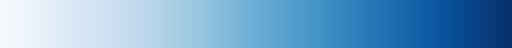

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorbrewer_Blues.inl


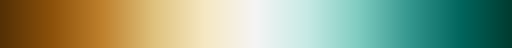

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorbrewer_BrBG.inl


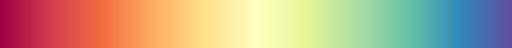

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorbrewer_Spectral.inl


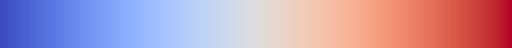

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/matplotlib_coolwarm.inl


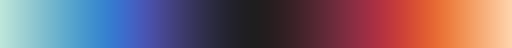

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/seaborn_icefire.inl


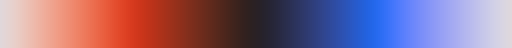

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/colorcet_CET_C3.inl


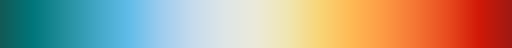

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/tol_nightfall.inl


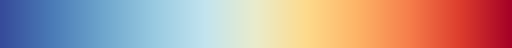

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/tol_sunset.inl


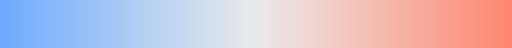

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/vispy_diverging.inl


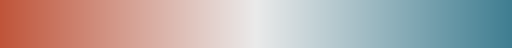

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/vispy_RdBu.inl


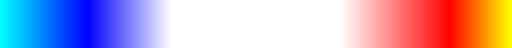

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/vispy_RdYeBuCy.inl


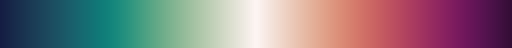

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_curl.inl


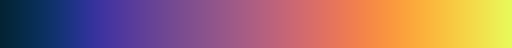

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_thermal.inl


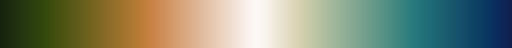

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_tarn.inl


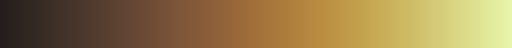

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_turbid.inl


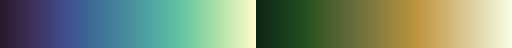

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_topo.inl


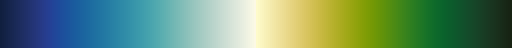

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_delta.inl


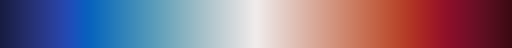

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_balance.inl


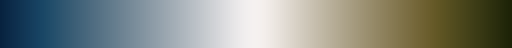

Seems like everything went fine enough for /home/joao/Developer/StudioSlab/Lib/Graphics/Styles/colormaps/cmocean_diff.inl


In [153]:
for map_name in mapped:
    generate_for(map_name)

wrap_it_up()